## 5.12 Exercises

5.1 Show how the result $\Sigma = \Lambda \Lambda^T + \Psi$ arises from the assumptions of uncorrelated factors, independence of the specific variates, and indpendence of common factors and specific variances. What form does $\Sigma$ take if the facotrs are allowed to be correlated?

$$
\begin{align*}
&\text{\bf{x}} = \underset{p\times 1}{\text{\bf{x}}},\\
&\text{\bf{u}} = \underset{p \times 1}{\text{\bf{u}}}, \\
&\text{\bf{x}} = \Lambda \text{\bf{f}} + \text{\bf{u}}, \quad \text{\bf{f}} = \underset{m \times 1}{\text{\bf{f}}}, \quad m \leq p,\\ 
&\Lambda = \underset{p \times m}{\Lambda}, \quad
\text{Var}(\text{\bf{u}}) = \Psi, \quad \Psi = \text{diag}(\psi_1, ..., \psi_p), \quad \text{Var}(\text{\bf{f}}) = I \\
&\forall ~i, j~~\text{Cov}(\text{\bf{f}}, \text{\bf{u}}) = 0, \quad i \in \{1, 2, ..., m\}, ~~ j \in \{1, 2, ..., p\}, \\
& \to \text{Var}(\text{\bf{x}}) = \Sigma = \text{Var}(\Lambda \text{\bf{f}}+\text{\bf{u}}) = \text{Var}(\Lambda \text{\bf{f}}) + \text{Var}(\text{\bf{u}}) + \text{Cov}(\Lambda\text{\bf{f}}, \text{\bf{u}}) + \text{Cov}(\text{\bf{u}}, \Lambda\text{\bf{f}}) = \\
& \Lambda \times \text{Var}(\text{\bf{f}}) \times \Lambda^T + \text{Var}(\text{\bf{u}}) + \Lambda \text{Cov}(\text{\bf{f}}, \text{\bf{u}}) + \text{Cov}(\text{\bf{u}}, \text{\bf{f}})\Lambda^T = \\
& \Lambda \times I \times \Lambda^T + \Psi + 0 + 0 = \Lambda \Lambda^T + \Psi. \\
& \text{If} ~~ \text{Var}(\text{\bf{f}}) \ne I, ~~ \text{Assume that} ~~ \text{Var}(\text{\bf{f}}) = \image, \quad \text{And}~ \image ~\text{Is not Diagonal Matrix}, \\
& \implies \text{Var}(\text{\bf{x}}) = \Sigma = \text{Var}(\Lambda\text{\bf{f}} + \text{\bf{u}}) = \\
& \Lambda \times \text{Var}(\text{\bf{f}})  \times \Lambda^T + \Psi + 0 + 0 = \Lambda \times \image \times \Lambda^T + \Psi
\end{align*}
$$
<hr><hr>
<br><br>

Ex. 5.2 show that the communalities in a factor analysis model are unaffected by the transformation $\boldsymbol{\Lambda^*} = \boldsymbol{\Lambda M}$. 

$$
\begin{align*}
& \text{We know that M is orthogonal Matrix, therefore}~~ M \times M^T = M^T \times M = I, \\
& M = \underset{m \times m}{M}, \quad \Lambda = \underset{p \times m}{\Lambda}, \quad \Lambda^* = \Lambda \times M = \underset{p \times m}{\Lambda^*}, \\
& \mathcal{R}_{\text{default}} = \text{diag}(h_{11}, h_{22}, ..., h_{pp}) = \text{diag}(\Lambda \times \Lambda^T),  \\
&\mathcal{R}_{\text{transform}} = \text{diag}(h'_{11}, h'_{22}, ..., h'_{pp}) = \text{diag}(\Lambda^* \times (\Lambda^*)^T) = \\
&\text{diag}(\Lambda \times M \times (\Lambda \times M)^T) = \text{diag}(\Lambda \times M \times M^T \times \Lambda^T) = \\
& \text{diag}(\Lambda \times (M \times M^T) \times \Lambda^T) = \\
& \text{diag}(\Lambda \times I \times \Lambda^T) = \mathcal{R}_{\text{default}}.
\end{align*}
$$
<hr><hr>
<br><br>

Ex. 5.3 Give a formula for proportion of variance explained by the jth factor estimated by the principal factor approach. 

$$
\begin{align*}
& \text{If Eigen values of Covariance Matrix or Correlation Matrix} = \{\lambda_1, \lambda_2, ..., \lambda_p\}\\
& \implies \text{Proportion of Variance Explained by the jth factor} = \frac{\lambda_j}{\sum_{i = 1}^p\lambda_i}
\end{align*}
$$
<hr><hr>
<br><br>

Ex. 5.4 Apply the factor analysis model separately to the life expectancies of men and women and compare the results. 

In [2]:
library(tidyverse)
library(psych)
colName <- c("country", "m0", "m25", "m50", "m75", 
"w0", "w25", "w50", "w75")
dat <- read_table(file = file.choose(), col_names = colName, 
col_types = cols("c", "d", "d", "d", "d", "d", "d", "d", "d"))
head(dat)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha




country,m0,m25,m50,m75,w0,w25,w50,w75
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Algeria,63,51,30,13,67,54,34,15
Cameroon,34,29,13,5,38,32,17,6
Madagascar,38,30,17,7,38,34,20,7
Mauritius,59,42,20,6,64,46,25,8
Reunion,56,38,18,7,62,46,25,10
Seychelles,62,44,24,7,69,50,28,14


In [3]:
n <- nrow(dat)
men_dat <- dat %>%
dplyr :: select(ends_with("y") | starts_with("m")) %>%
column_to_rownames(var = "country")
head(men_dat)

,m0,m25,m50,m75
,<dbl>,<dbl>,<dbl>,<dbl>
Algeria,63,51,30,13
Cameroon,34,29,13,5
Madagascar,38,30,17,7
Mauritius,59,42,20,6
Reunion,56,38,18,7
Seychelles,62,44,24,7


In [4]:
n <- nrow(dat)
women_dat <- dat %>%
dplyr :: select(ends_with("y") | starts_with("w")) %>% 
column_to_rownames(var = "country")
head(women_dat)

,w0,w25,w50,w75
,<dbl>,<dbl>,<dbl>,<dbl>
Algeria,67,54,34,15
Cameroon,38,32,17,6
Madagascar,38,34,20,7
Mauritius,64,46,25,8
Reunion,62,46,25,10
Seychelles,69,50,28,14


In [18]:
library(GPArotation)
men_model_3_ob <- fa(men_dat, nfactors = 3, fm = "ml")
men_model_3_ob

Factor Analysis using method =  ml
Call: fa(r = men_dat, nfactors = 3, fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
     ML3   ML1   ML2   h2    u2 com
m0  0.95 -0.03 -0.03 0.84 0.159   1
m25 0.75  0.07  0.07 0.69 0.311   1
m50 0.00  1.00  0.00 0.99 0.005   1
m75 0.00  0.00  0.96 0.92 0.077   1

                       ML3  ML1  ML2
SS loadings           1.48 1.02 0.94
Proportion Var        0.37 0.26 0.24
Cumulative Var        0.37 0.63 0.86
Proportion Explained  0.43 0.30 0.27
Cumulative Proportion 0.43 0.73 1.00

 With factor correlations of 
     ML3  ML1  ML2
ML3 1.00 0.73 0.37
ML1 0.73 1.00 0.79
ML2 0.37 0.79 1.00

Mean item complexity =  1
Test of the hypothesis that 3 factors are sufficient.

The degrees of freedom for the null model are  6  and the objective function was  2.47 with Chi Square of  68.75
The degrees of freedom for the model are -3  and the objective function was  0 

The root mean square of the residuals (RMSR) is  0 
The df corr

In [19]:
men_model_3_var <- fa(men_dat, nfactors = 3, fm = "ml", 
rotate = "varimax")
men_model_3_var

Factor Analysis using method =  ml
Call: fa(r = men_dat, nfactors = 3, rotate = "varimax", fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
     ML3  ML1  ML2   h2    u2 com
m0  0.90 0.13 0.14 0.84 0.159 1.1
m25 0.77 0.25 0.17 0.69 0.311 1.3
m50 0.53 0.63 0.56 0.99 0.005 2.9
m75 0.17 0.94 0.12 0.92 0.077 1.1

                       ML3  ML1  ML2
SS loadings           1.71 1.36 0.38
Proportion Var        0.43 0.34 0.09
Cumulative Var        0.43 0.77 0.86
Proportion Explained  0.50 0.39 0.11
Cumulative Proportion 0.50 0.89 1.00

Mean item complexity =  1.6
Test of the hypothesis that 3 factors are sufficient.

The degrees of freedom for the null model are  6  and the objective function was  2.47 with Chi Square of  68.75
The degrees of freedom for the model are -3  and the objective function was  0 

The root mean square of the residuals (RMSR) is  0 
The df corrected root mean square of the residuals is  NA 

The harmonic number of observations is  31 wit

In [20]:
men_model_2_ob <- fa(men_dat, nfactors = 2)
men_model_2_ob

Factor Analysis using method =  minres
Call: fa(r = men_dat, nfactors = 2)
Standardized loadings (pattern matrix) based upon correlation matrix
      MR1   MR2   h2    u2 com
m0   0.95 -0.05 0.86 0.144 1.0
m25  0.74  0.15 0.68 0.317 1.1
m50  0.35  0.72 0.91 0.094 1.4
m75 -0.11  0.92 0.76 0.239 1.0

                       MR1  MR2
SS loadings           1.70 1.51
Proportion Var        0.42 0.38
Cumulative Var        0.42 0.80
Proportion Explained  0.53 0.47
Cumulative Proportion 0.53 1.00

 With factor correlations of 
    MR1 MR2
MR1 1.0 0.5
MR2 0.5 1.0

Mean item complexity =  1.1
Test of the hypothesis that 2 factors are sufficient.

The degrees of freedom for the null model are  6  and the objective function was  2.47 with Chi Square of  68.75
The degrees of freedom for the model are -1  and the objective function was  0 

The root mean square of the residuals (RMSR) is  0 
The df corrected root mean square of the residuals is  NA 

The harmonic number of observations is  31 with the

In [21]:
men_model_2_var <- fa(men_dat, nfactors = 2, fm = "ml",
rotate = "varimax")
men_model_2_var

Factor Analysis using method =  ml
Call: fa(r = men_dat, nfactors = 2, rotate = "varimax", fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
     ML2  ML1   h2   u2 com
m0  0.89 0.17 0.83 0.17 1.1
m25 0.78 0.30 0.70 0.30 1.3
m50 0.57 0.73 0.87 0.13 1.9
m75 0.15 0.90 0.84 0.16 1.1

                       ML2  ML1
SS loadings           1.76 1.48
Proportion Var        0.44 0.37
Cumulative Var        0.44 0.81
Proportion Explained  0.54 0.46
Cumulative Proportion 0.54 1.00

Mean item complexity =  1.3
Test of the hypothesis that 2 factors are sufficient.

The degrees of freedom for the null model are  6  and the objective function was  2.47 with Chi Square of  68.75
The degrees of freedom for the model are -1  and the objective function was  0 

The root mean square of the residuals (RMSR) is  0 
The df corrected root mean square of the residuals is  NA 

The harmonic number of observations is  31 with the empirical chi square  0  with prob <  NA 
The total nu

In [22]:
men_model_1 <- fa(men_dat, nfactors = 1, fm = "ml")
men_model_1

Factor Analysis using method =  ml
Call: fa(r = men_dat, nfactors = 1, fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
     ML1   h2    u2 com
m0  0.64 0.41 0.594   1
m25 0.67 0.45 0.552   1
m50 1.00 1.00 0.005   1
m75 0.75 0.57 0.434   1

                ML1
SS loadings    2.42
Proportion Var 0.60

Mean item complexity =  1
Test of the hypothesis that 1 factor is sufficient.

The degrees of freedom for the null model are  6  and the objective function was  2.47 with Chi Square of  68.75
The degrees of freedom for the model are 2  and the objective function was  0.53 

The root mean square of the residuals (RMSR) is  0.16 
The df corrected root mean square of the residuals is  0.28 

The harmonic number of observations is  31 with the empirical chi square  9.42  with prob <  0.009 
The total number of observations was  31  with Likelihood Chi Square =  14.45  with prob <  0.00073 

Tucker Lewis Index of factoring reliability =  0.389
RMSEA index =  0.447

In [23]:
women_model_3_ob <- fa(women_dat, nfactors = 3, fm = "ml")
women_model_3_ob

Factor Analysis using method =  ml
Call: fa(r = women_dat, nfactors = 3, fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
     ML2   ML3   ML1   h2     u2 com
w0  0.00  0.00  0.99 0.99 0.0057 1.0
w25 0.01  1.00 -0.01 0.99 0.0054 1.0
w50 0.72  0.17  0.21 0.99 0.0111 1.3
w75 0.95 -0.04 -0.07 0.80 0.1980 1.0

                       ML2  ML3  ML1
SS loadings           1.54 1.13 1.11
Proportion Var        0.38 0.28 0.28
Cumulative Var        0.38 0.67 0.94
Proportion Explained  0.41 0.30 0.29
Cumulative Proportion 0.41 0.71 1.00

 With factor correlations of 
     ML2  ML3  ML1
ML2 1.00 0.82 0.49
ML3 0.82 1.00 0.89
ML1 0.49 0.89 1.00

Mean item complexity =  1.1
Test of the hypothesis that 3 factors are sufficient.

The degrees of freedom for the null model are  6  and the objective function was  6.21 with Chi Square of  172.97
The degrees of freedom for the model are -3  and the objective function was  0 

The root mean square of the residuals (RMSR) is  0 
T

In [24]:
women_model_3_var <- fa(women_dat, nfactors = 3, fm = "ml", rotate = "varimax")
women_model_3_var

Factor Analysis using method =  ml
Call: fa(r = women_dat, nfactors = 3, rotate = "varimax", fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
     ML2  ML1   ML3   h2     u2 com
w0  0.22 0.97 -0.01 0.99 0.0057 1.1
w25 0.62 0.77  0.10 0.99 0.0054 1.9
w50 0.83 0.54  0.02 0.99 0.0111 1.7
w75 0.88 0.18  0.01 0.80 0.1980 1.1

                       ML2  ML1  ML3
SS loadings           1.90 1.87 0.01
Proportion Var        0.47 0.47 0.00
Cumulative Var        0.47 0.94 0.94
Proportion Explained  0.50 0.50 0.00
Cumulative Proportion 0.50 1.00 1.00

Mean item complexity =  1.5
Test of the hypothesis that 3 factors are sufficient.

The degrees of freedom for the null model are  6  and the objective function was  6.21 with Chi Square of  172.97
The degrees of freedom for the model are -3  and the objective function was  0 

The root mean square of the residuals (RMSR) is  0 
The df corrected root mean square of the residuals is  NA 

The harmonic number of observatio

In [25]:
women_model_2_ob <- fa(women_dat, nfactors = 2, fm = "ml")
women_model_2_ob

Factor Analysis using method =  ml
Call: fa(r = women_dat, nfactors = 2, fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
      ML2   ML1   h2    u2 com
w0  -0.05  1.02 0.98 0.015 1.0
w25  0.48  0.64 0.99 0.012 1.9
w50  0.80  0.30 0.99 0.011 1.3
w75  0.97 -0.14 0.80 0.196 1.0

                       ML2  ML1
SS loadings           2.01 1.76
Proportion Var        0.50 0.44
Cumulative Var        0.50 0.94
Proportion Explained  0.53 0.47
Cumulative Proportion 0.53 1.00

 With factor correlations of 
     ML2  ML1
ML2 1.00 0.56
ML1 0.56 1.00

Mean item complexity =  1.3
Test of the hypothesis that 2 factors are sufficient.

The degrees of freedom for the null model are  6  and the objective function was  6.21 with Chi Square of  172.97
The degrees of freedom for the model are -1  and the objective function was  0 

The root mean square of the residuals (RMSR) is  0 
The df corrected root mean square of the residuals is  NA 

The harmonic number of observations

In [26]:
women_model_2_var <- fa(women_dat, nfactors = 2, fm = "ml", rotate = "varimax")
women_model_2_var

Factor Analysis using method =  ml
Call: fa(r = women_dat, nfactors = 2, rotate = "varimax", fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
     ML2  ML1   h2    u2 com
w0  0.22 0.97 0.98 0.015 1.1
w25 0.62 0.78 0.99 0.012 1.9
w50 0.83 0.55 0.99 0.011 1.7
w75 0.88 0.18 0.80 0.196 1.1

                       ML2  ML1
SS loadings           1.89 1.88
Proportion Var        0.47 0.47
Cumulative Var        0.47 0.94
Proportion Explained  0.50 0.50
Cumulative Proportion 0.50 1.00

Mean item complexity =  1.5
Test of the hypothesis that 2 factors are sufficient.

The degrees of freedom for the null model are  6  and the objective function was  6.21 with Chi Square of  172.97
The degrees of freedom for the model are -1  and the objective function was  0 

The root mean square of the residuals (RMSR) is  0 
The df corrected root mean square of the residuals is  NA 

The harmonic number of observations is  31 with the empirical chi square  0  with prob <  NA 
The 

In [27]:
women_model_1 <- fa(women_dat, nfactors = 1, fm = "ml")
women_model_1

Factor Analysis using method =  ml
Call: fa(r = women_dat, nfactors = 1, fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
     ML1   h2     u2 com
w0  0.88 0.78 0.2204   1
w25 1.00 1.00 0.0048   1
w50 0.94 0.89 0.1146   1
w75 0.69 0.47 0.5260   1

                ML1
SS loadings    3.13
Proportion Var 0.78

Mean item complexity =  1
Test of the hypothesis that 1 factor is sufficient.

The degrees of freedom for the null model are  6  and the objective function was  6.21 with Chi Square of  172.97
The degrees of freedom for the model are 2  and the objective function was  1.92 

The root mean square of the residuals (RMSR) is  0.13 
The df corrected root mean square of the residuals is  0.23 

The harmonic number of observations is  31 with the empirical chi square  6.57  with prob <  0.037 
The total number of observations was  31  with Likelihood Chi Square =  52.12  with prob <  4.8e-12 

Tucker Lewis Index of factoring reliability =  0.077
RMSEA index 

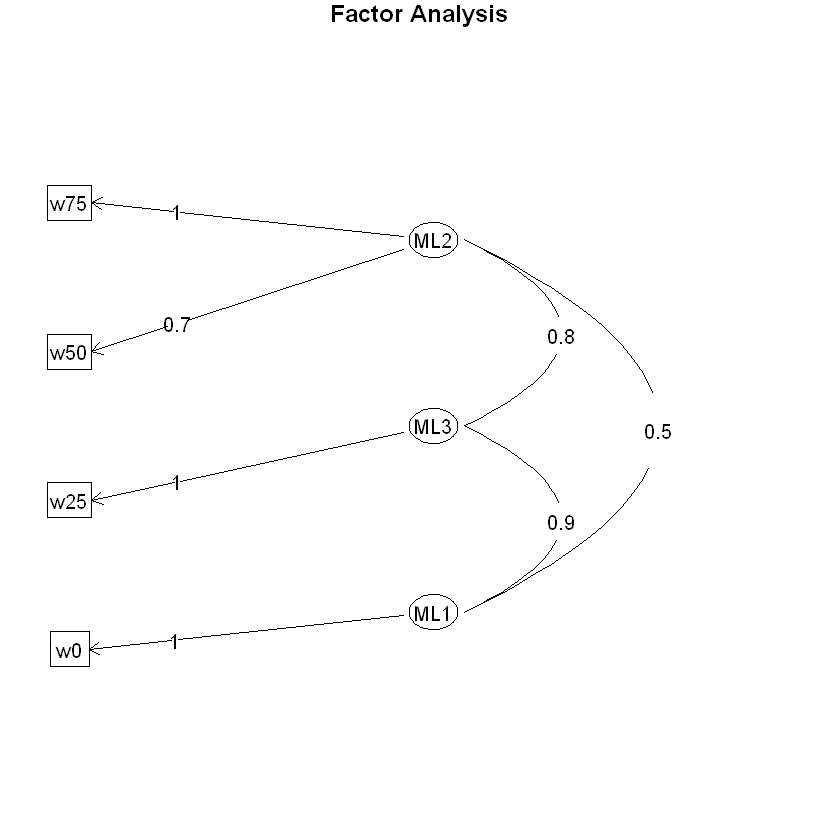

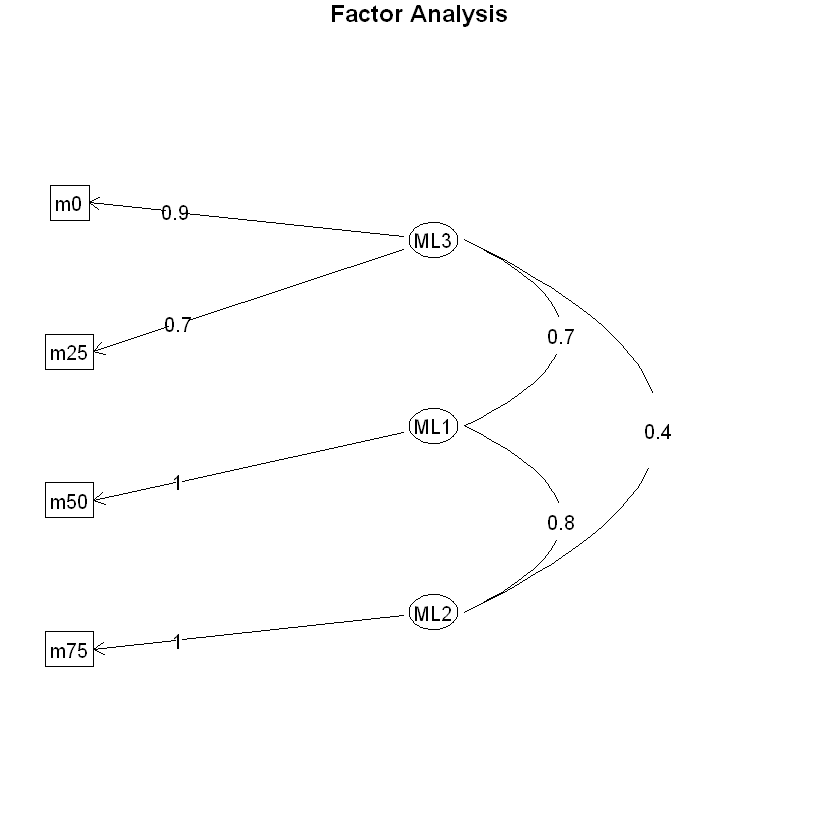

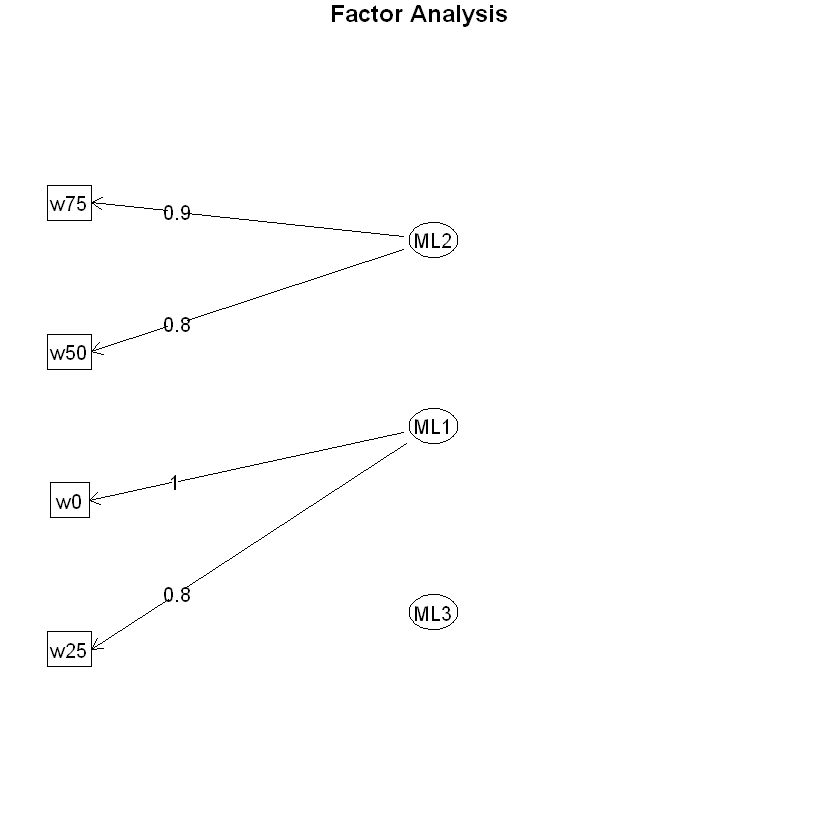

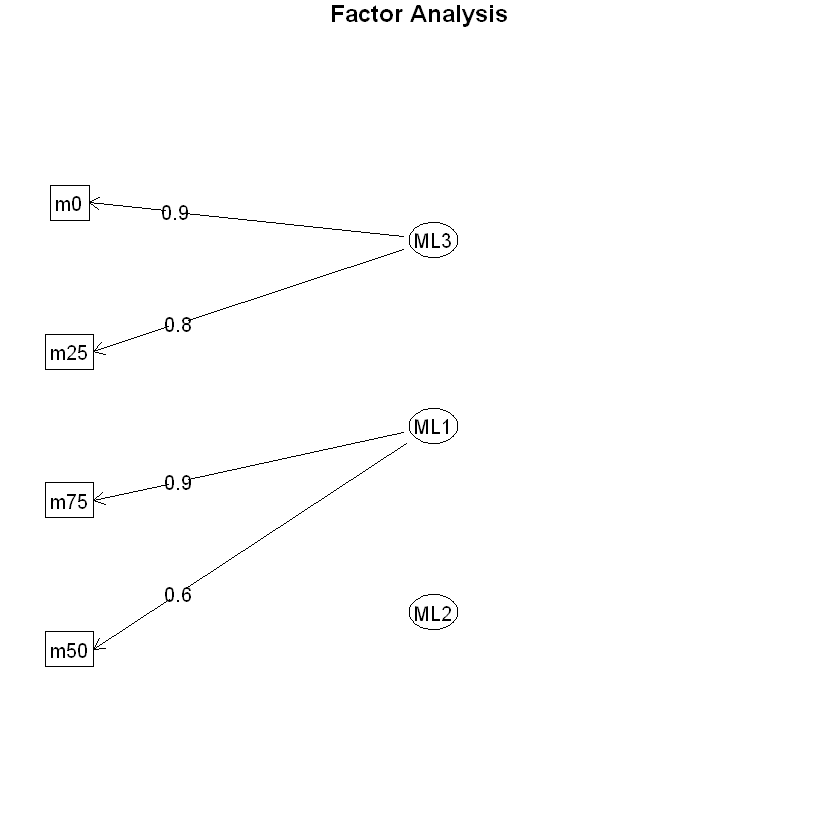

In [28]:
fa.diagram(women_model_3_ob)
fa.diagram(men_model_3_ob)
fa.diagram(women_model_3_var)
fa.diagram(men_model_3_var)

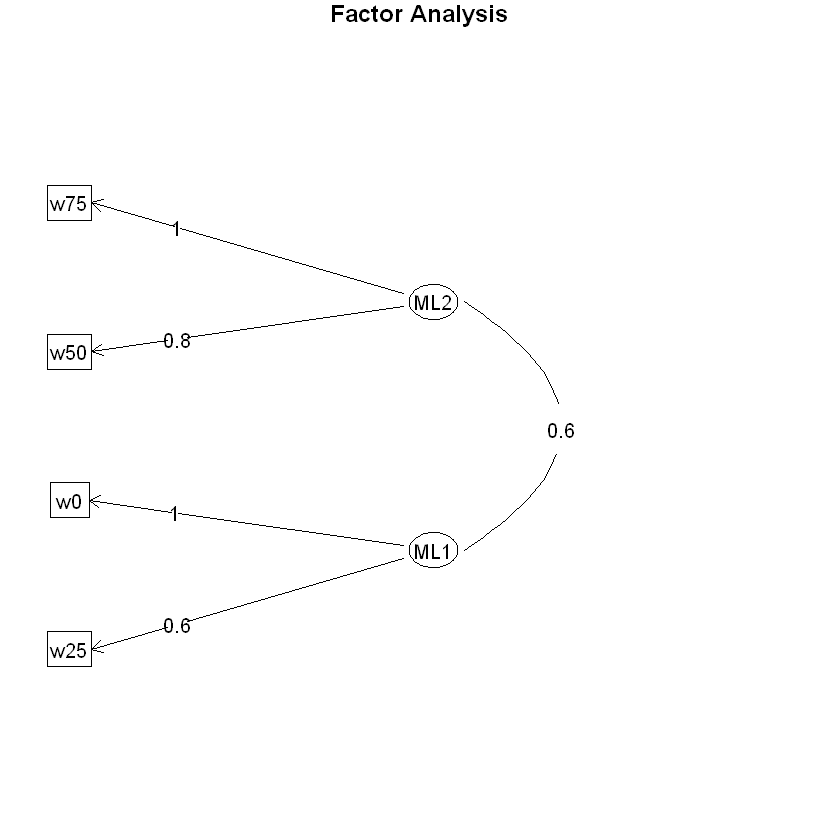

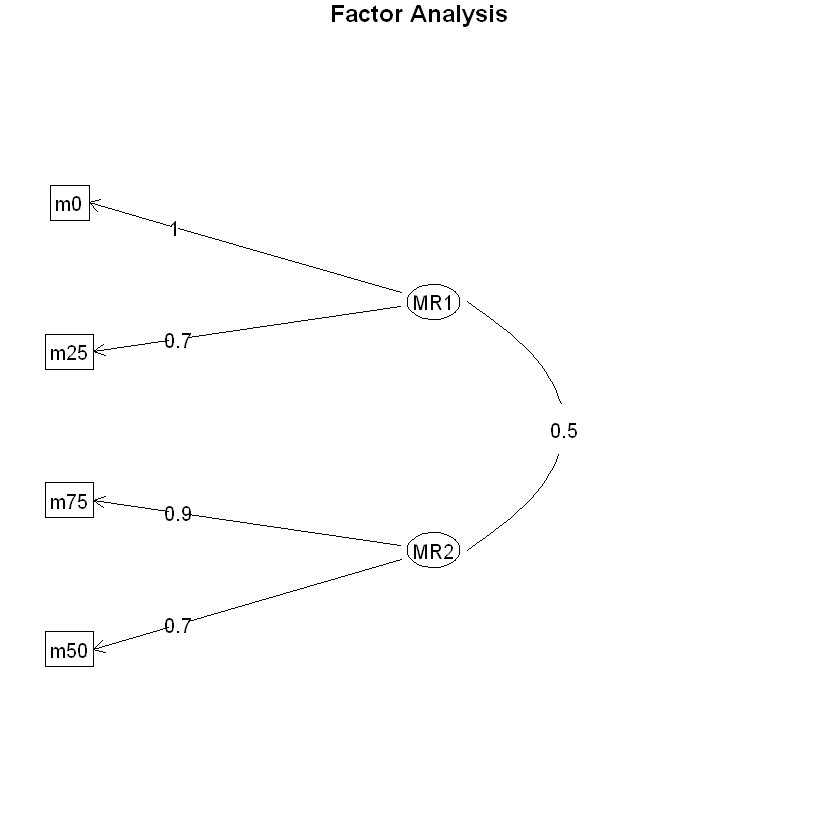

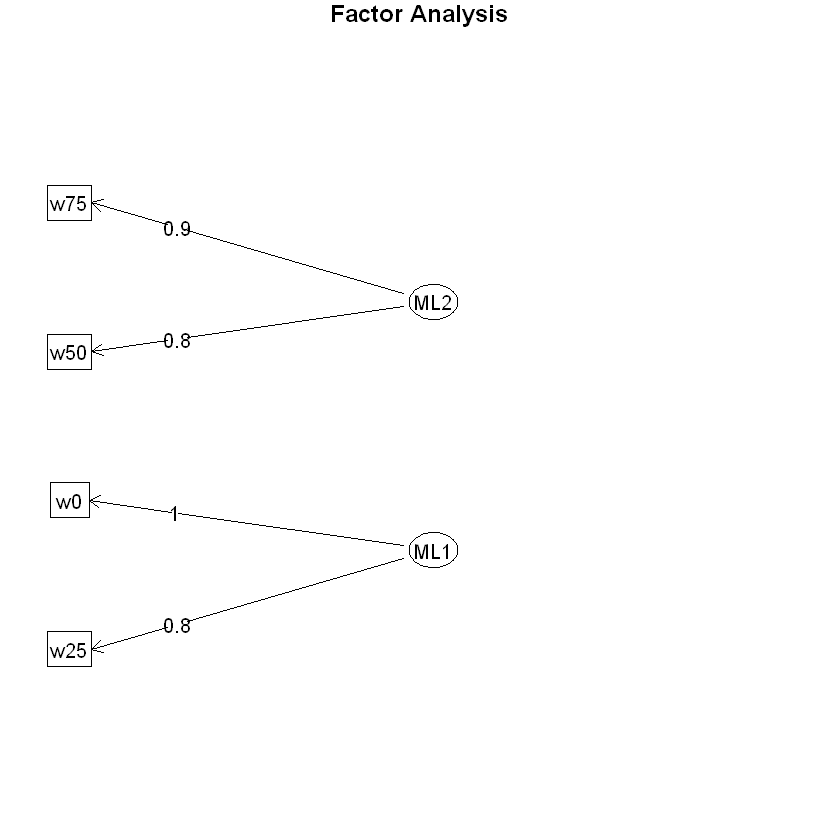

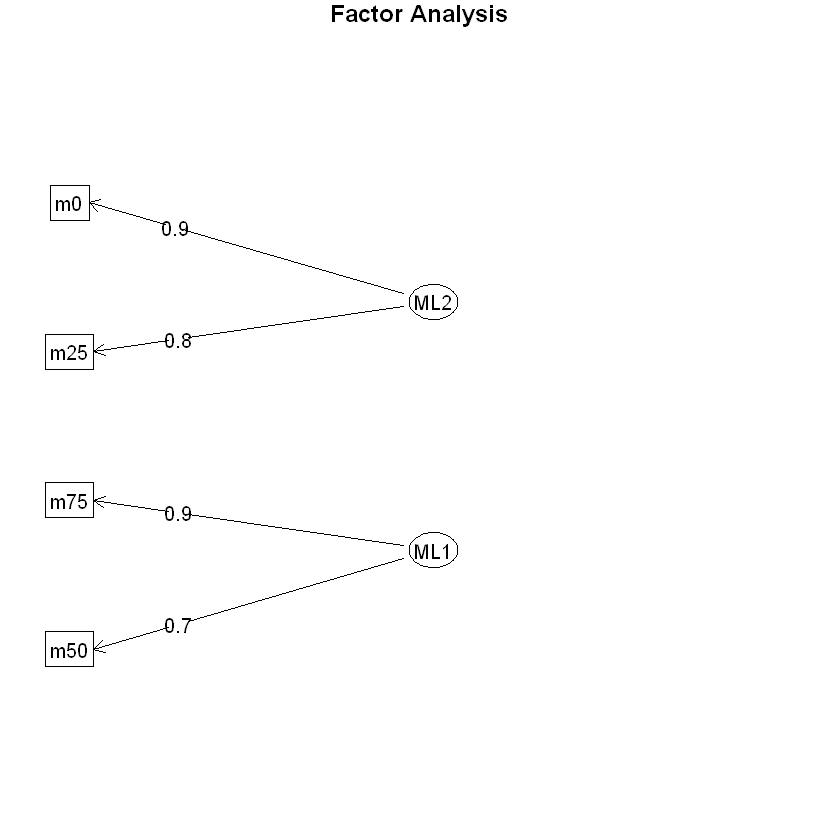

In [29]:
fa.diagram(women_model_2_ob)
fa.diagram(men_model_2_ob)
fa.diagram(women_model_2_var)
fa.diagram(men_model_2_var)

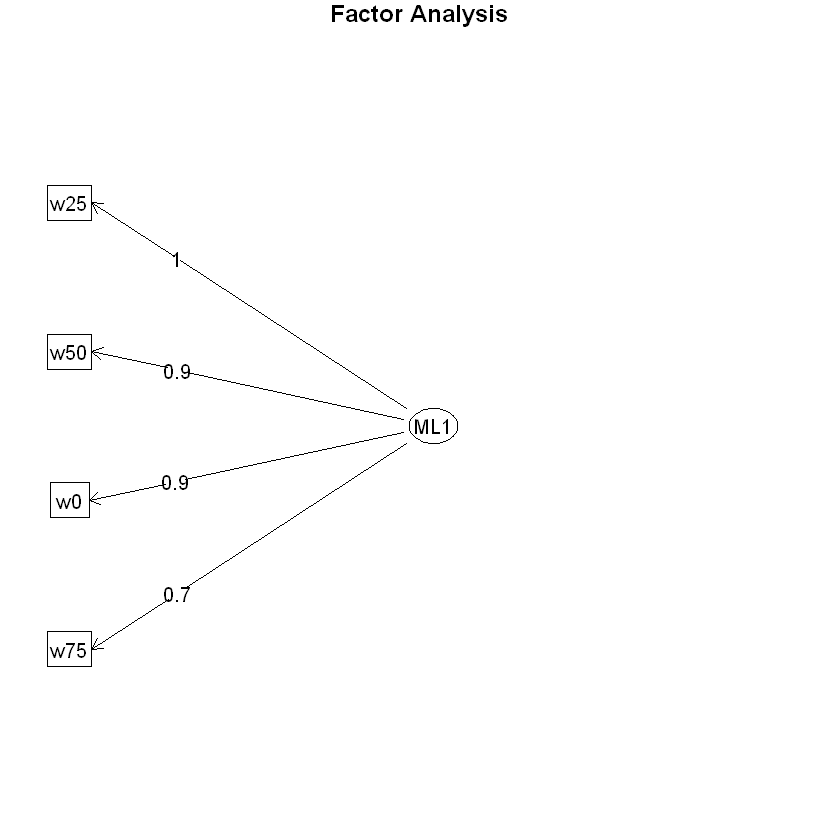

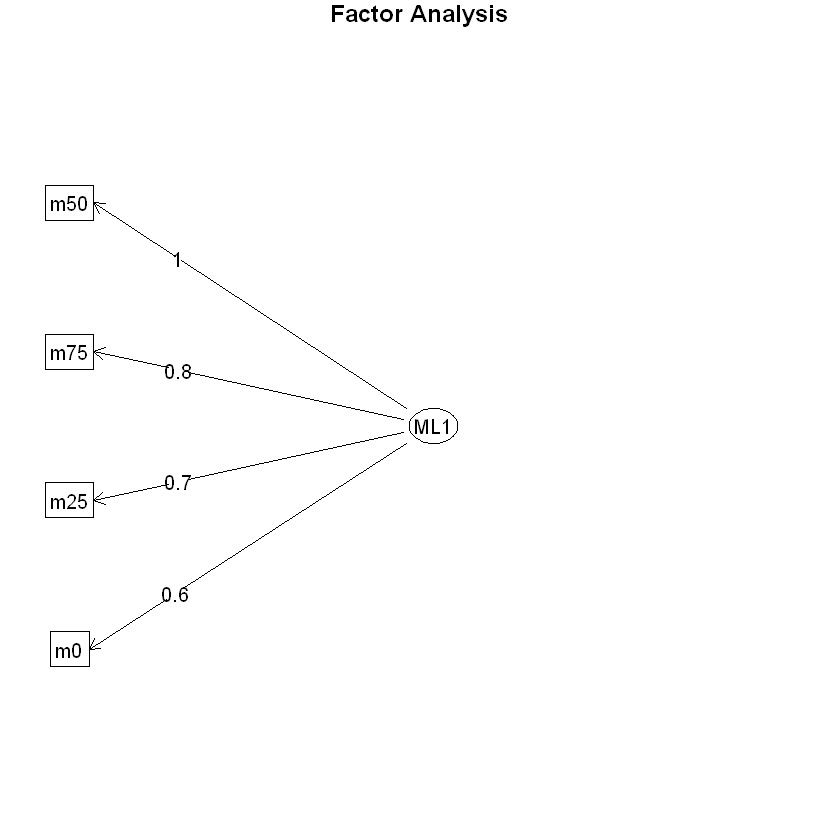

In [30]:
fa.diagram(women_model_1)
fa.diagram(men_model_1)

<hr><hr>
<br><br>

Ex. 5.5 The corrleation matrix given below arises from the scores of 220 boys 
in six school subjects: (1) French, (2) English, (3) History, (4) Arighmetic, 
(5) Algebra, and (6) Geometry. Find the two-factor soloution from a maximum likelihood factor analysis. By plotting the derived loadings, find an orthogonal rotation that allows easier interpretaion of the results. 

In [119]:
dat5_ <- textConnection("
1.00
0.44 1.00
0.41 0.35 1.00
0.29 0.35 0.16 1.00
0.33 0.32 0.19 0.59 1.00
0.25 0.33 0.18 0.47 0.46 1.00
")

In [120]:
dd <- readLines(dat5_)

In [121]:
corr_mat <- matrix(NA, 6, 6)

In [122]:
j <- 1
for(i in 2:7){
    dd[i] %>% strsplit(" ") %>% unlist %>% as.numeric-> dd2
    corr_mat[j, 1:(i-1)] <- corr_mat[1:(i-1), j] <- dd2
    j <- j + 1
}


In [129]:
input2 <- textConnection("
French
English
History
Arithmetic
Algebra
Geometry
")
dat_2 <- readLines(input2)[2:7]

In [135]:
dimnames(corr_mat) <- list(dat_2, dat_2)
corr_mat

,French,English,History,Arithmetic,Algebra,Geometry
French,1.00,0.44,0.41,0.29,0.33,0.25
English,0.44,1.00,0.35,0.35,0.32,0.33
History,0.41,0.35,1.00,0.16,0.19,0.18
Arithmetic,0.29,0.35,0.16,1.00,0.59,0.47
Algebra,0.33,0.32,0.19,0.59,1.00,0.46
Geometry,0.25,0.33,0.18,0.47,0.46,1.00


In [146]:
model <- fa(r = corr_mat, nfactors = 2, n.obs = 220, rotate = "varimax")
model

Factor Analysis using method =  minres
Call: fa(r = corr_mat, nfactors = 2, n.obs = 220, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
            MR1  MR2   h2   u2 com
French     0.23 0.66 0.49 0.51 1.2
English    0.32 0.55 0.41 0.59 1.6
History    0.08 0.59 0.36 0.64 1.0
Arithmetic 0.77 0.17 0.62 0.38 1.1
Algebra    0.71 0.22 0.56 0.44 1.2
Geometry   0.57 0.22 0.37 0.63 1.3

                       MR1  MR2
SS loadings           1.59 1.21
Proportion Var        0.27 0.20
Cumulative Var        0.27 0.47
Proportion Explained  0.57 0.43
Cumulative Proportion 0.57 1.00

Mean item complexity =  1.2
Test of the hypothesis that 2 factors are sufficient.

The degrees of freedom for the null model are  15  and the objective function was  1.43 with Chi Square of  308.57
The degrees of freedom for the model are 4  and the objective function was  0.01 

The root mean square of the residuals (RMSR) is  0.01 
The df corrected root mean square of the residu

In [147]:
loadingss <- model$loadings[]
loadingss

,MR1,MR2
French,0.23063672,0.6609151
English,0.32116436,0.5519458
History,0.08239394,0.5902654
Arithmetic,0.76893465,0.1720072
Algebra,0.71433734,0.2183644
Geometry,0.57225661,0.2171600


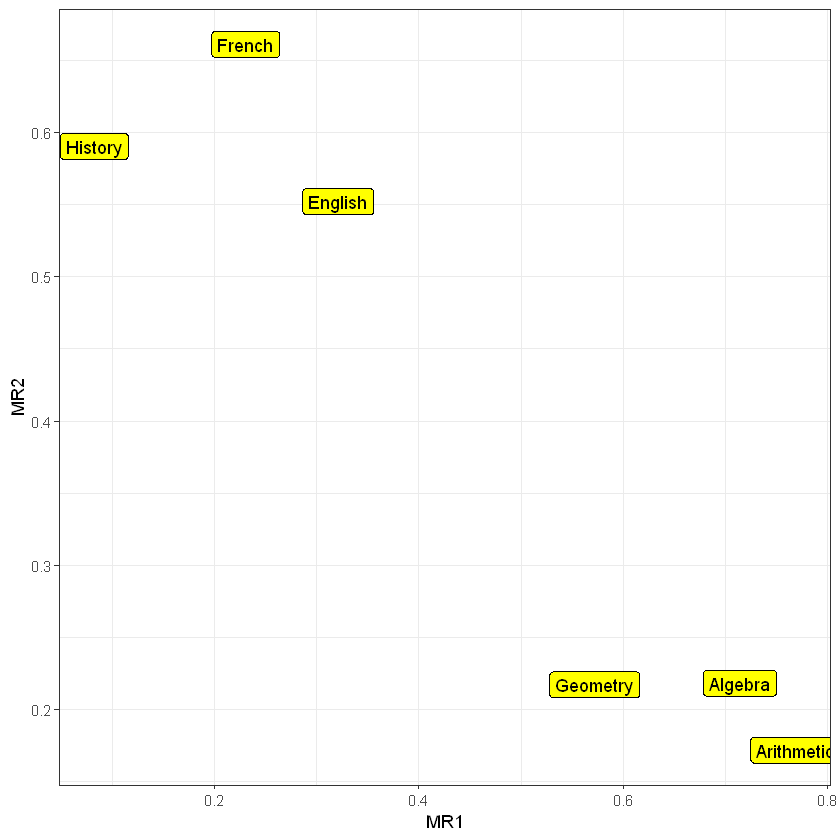

In [148]:
loadingss %>% 
as.data.frame %>% 
rownames_to_column(var = "lang") %>%
ggplot(aes(x = MR1, y = MR2)) +
geom_label(aes(label = lang), fill = "yellow") +
theme_bw()

<hr><hr>
<br><br>

Ex. 5.6 The matrix below shows the correlations between ratings on nine
statements about pain made by 123 people suffering from extreme pain.
Each statement was scored on a scale from 1 to 6, ranging from agreement
to disagreement. The nine pain statements were as follows:
1. Whether or not I am in pain in the future depends on the skills of the
doctors.
2. Whenever I am in pain, it is usually because of something I have done
or not done,
3. Whether or not I am in pain depends on what the doctors do for me.
4. I cannot get any help for my pain unless I go to seek medical advice.
5. When I am in pain I know that it is because I have not been taking
proper exercise or eating the right food.
6. People’s pain results from their own carelessness.
7. I am directly responsible for my pain,
8. relief from pain is chiefly controlled by the doctors.
9. People who are never in pain are just plain lucky.

In [171]:
input3 <- textConnection("
1.00
-0.04 1.00
0.61 -0.07 1.00
0.45 -0.12 0.59 1.00
0.03 0.49 0.03 -0.08 1.00
-0.29 0.43 -0.13 -0.21 0.47 1.00
-0.30 0.30 -0.24 -0.19 0.41 0.63 1.00
0.45 -0.31 0.59 0.63 -0.14 -0.13 -0.26 1.00
0.30 -0.17 0.32 0.37 -0.24 -0.15 -0.29 0.40 1.00
")
dat_3 <- readLines(input3)

In [176]:
n <- 123
corr_mat_2 <- matrix(NA, 9, 9)
j <- 1
for(i in 2:10){
    dat_3[i] %>% strsplit(" ") %>% unlist %>% as.numeric-> temp
    corr_mat_2[j, 1:(i-1)] <- corr_mat_2[1:(i-1), j] <- temp
    j <- j + 1
}

In [180]:
name1 <- paste0("statement", 1:9)
dimnames(corr_mat_2) <- list(name1, name1)
corr_mat_2

,statement1,statement2,statement3,statement4,statement5,statement6,statement7,statement8,statement9
statement1,1.00,-0.04,0.61,0.45,0.03,-0.29,-0.30,0.45,0.30
statement2,-0.04,1.00,-0.07,-0.12,0.49,0.43,0.30,-0.31,-0.17
statement3,0.61,-0.07,1.00,0.59,0.03,-0.13,-0.24,0.59,0.32
statement4,0.45,-0.12,0.59,1.00,-0.08,-0.21,-0.19,0.63,0.37
statement5,0.03,0.49,0.03,-0.08,1.00,0.47,0.41,-0.14,-0.24
statement6,-0.29,0.43,-0.13,-0.21,0.47,1.00,0.63,-0.13,-0.15
statement7,-0.30,0.30,-0.24,-0.19,0.41,0.63,1.00,-0.26,-0.29
statement8,0.45,-0.31,0.59,0.63,-0.14,-0.13,-0.26,1.00,0.40
statement9,0.30,-0.17,0.32,0.37,-0.24,-0.15,-0.29,0.40,1.00


(a) Perform a principal components analysis on these data, and examine the associated scree plot to decide on the appropriate number of
components.

In [182]:
library(factoextra)

In [183]:
model2 <- princomp(covmat = corr_mat_2)

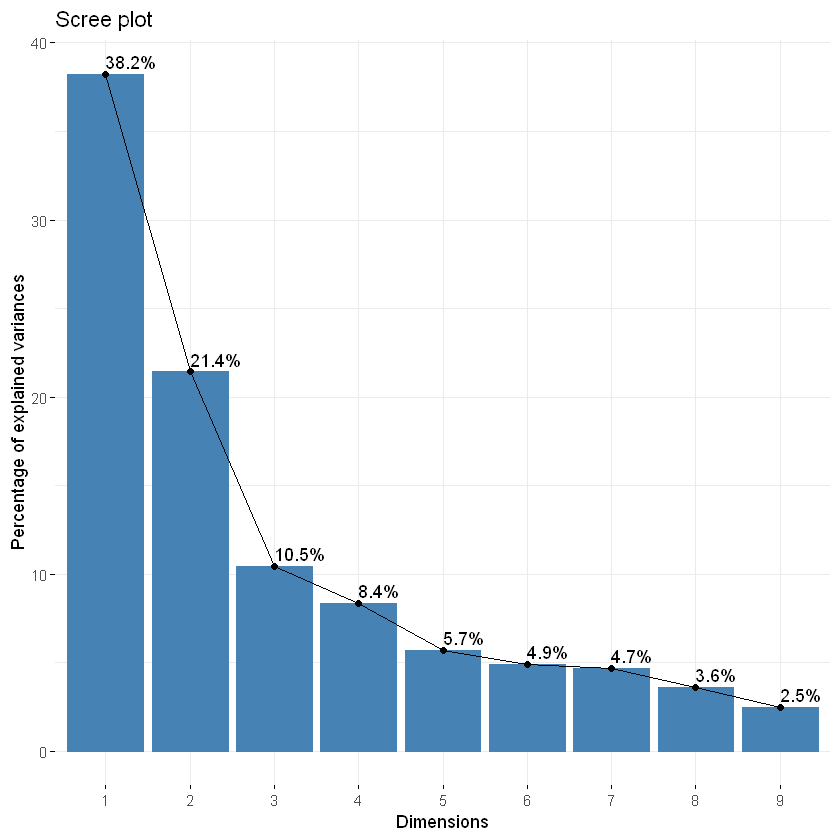

In [190]:
fviz_screeplot(model2, addlabels = T)

(b) Apply maximum likelihood factor analysis, and use the test described
in the chapter to select the necessary number of common factors.

In [210]:
m <- 5
sapply(1:m, function(x){
    model_temp <- fa(r = corr_mat_2, nfactors = x, 
    n.obs = n)
    cat(sprintf("pvalue for %d factor = %.6f   \n", x, model_temp$PVAL))
    ""
})

pvalue for 1 factor = 0.000000   
pvalue for 2 factor = 0.000002   
pvalue for 3 factor = 0.063963   
pvalue for 4 factor = 0.051741   
pvalue for 5 factor = 0.291072   


[1] "" "" "" "" ""

(c) Rotate the factor solution selected using both an orthogonal and an
oblique procedure, and interpret the results.

In [225]:
library(GPArotation)
model_1_ob <- fa(r = corr_mat_2, nfactors = 2, n.obs = n, rotate = "oblimin")
model_2_var <- fa(r = corr_mat_2, n.obs = n, nfactors = 2, rotate = "varimax")

In [226]:
model_1_ob

Factor Analysis using method =  minres
Call: fa(r = corr_mat_2, nfactors = 2, n.obs = n, rotate = "oblimin")
Standardized loadings (pattern matrix) based upon correlation matrix
             MR1   MR2   h2   u2 com
statement1  0.66 -0.03 0.45 0.55 1.0
statement2 -0.01  0.58 0.34 0.66 1.0
statement3  0.85  0.10 0.69 0.31 1.0
statement4  0.74 -0.02 0.55 0.45 1.0
statement5  0.13  0.74 0.51 0.49 1.1
statement6 -0.04  0.74 0.57 0.43 1.0
statement7 -0.17  0.63 0.48 0.52 1.1
statement8  0.72 -0.10 0.57 0.43 1.0
statement9  0.40 -0.20 0.25 0.75 1.5

                       MR1  MR2
SS loadings           2.48 1.93
Proportion Var        0.28 0.21
Cumulative Var        0.28 0.49
Proportion Explained  0.56 0.44
Cumulative Proportion 0.56 1.00

 With factor correlations of 
      MR1   MR2
MR1  1.00 -0.26
MR2 -0.26  1.00

Mean item complexity =  1.1
Test of the hypothesis that 2 factors are sufficient.

The degrees of freedom for the null model are  36  and the objective function was  3.4 with Chi 

In [227]:
model_2_var

Factor Analysis using method =  minres
Call: fa(r = corr_mat_2, nfactors = 2, n.obs = n, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
             MR1   MR2   h2   u2 com
statement1  0.66 -0.10 0.45 0.55 1.0
statement2 -0.10  0.58 0.34 0.66 1.1
statement3  0.83  0.01 0.69 0.31 1.0
statement4  0.74 -0.10 0.55 0.45 1.0
statement5  0.02  0.71 0.51 0.49 1.0
statement6 -0.16  0.74 0.57 0.43 1.1
statement7 -0.26  0.64 0.48 0.52 1.3
statement8  0.74 -0.17 0.57 0.43 1.1
statement9  0.43 -0.24 0.25 0.75 1.6

                       MR1  MR2
SS loadings           2.50 1.90
Proportion Var        0.28 0.21
Cumulative Var        0.28 0.49
Proportion Explained  0.57 0.43
Cumulative Proportion 0.57 1.00

Mean item complexity =  1.1
Test of the hypothesis that 2 factors are sufficient.

The degrees of freedom for the null model are  36  and the objective function was  3.4 with Chi Square of  401.56
The degrees of freedom for the model are 19  and the objectiv

In [228]:
loadingss_ob <- model_1_ob$loadings[]
loadingss_var <- model_2_var$loadings[]

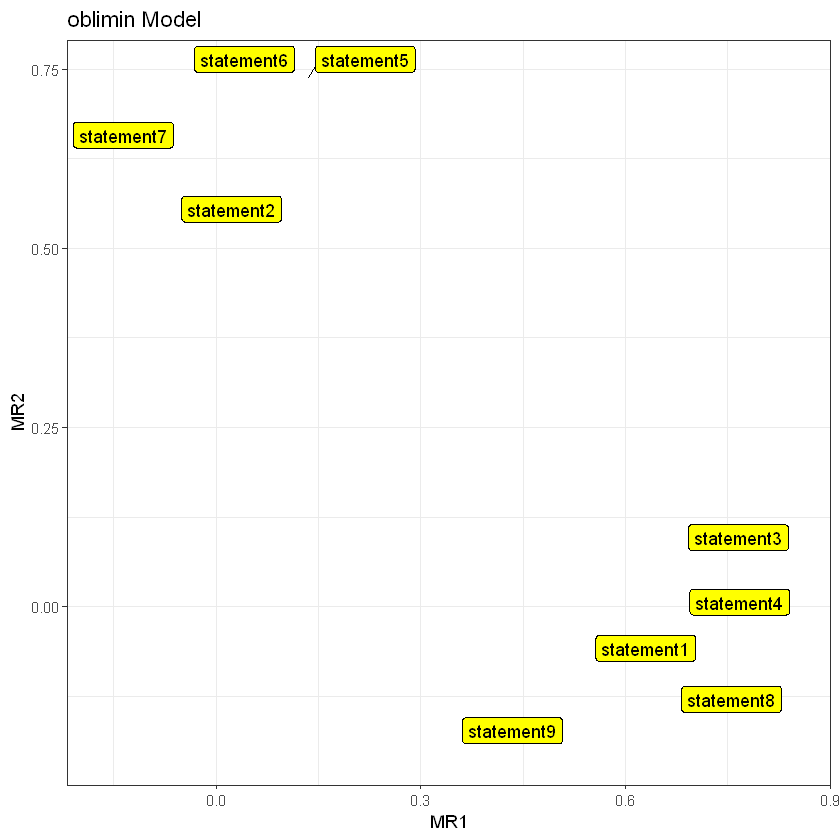

In [235]:
library(ggrepel)
loadingss_ob %>%
as.data.frame %>%
rownames_to_column(var = "state") %>%
ggplot(aes(x = MR1, y = MR2)) +
geom_label_repel(aes(label = state), fill = 'yellow') +
labs(title = "oblimin Model")+
theme_bw()

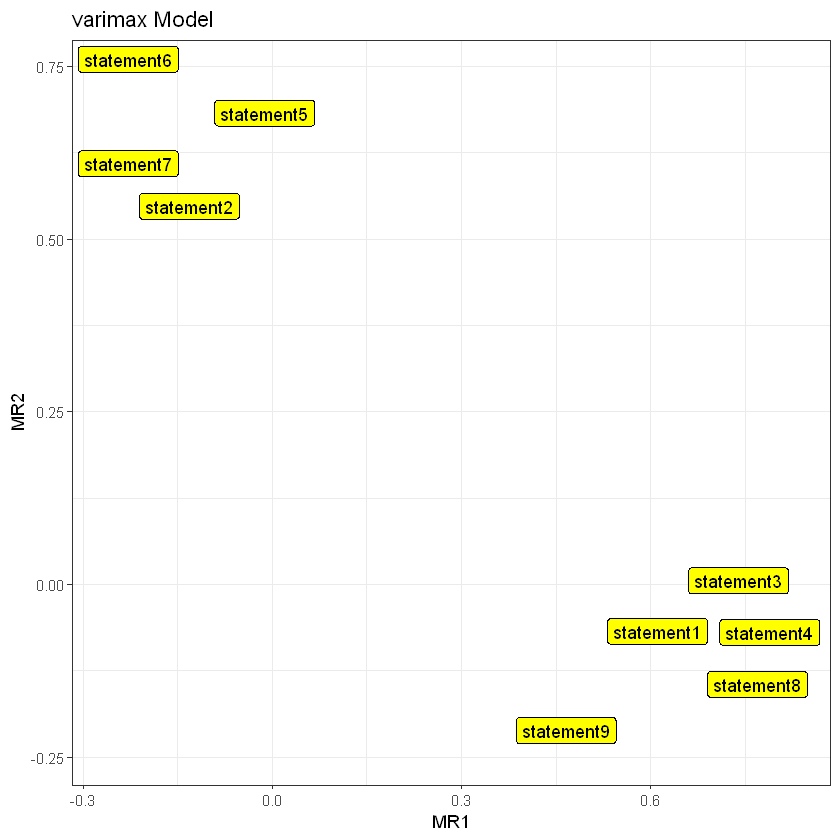

In [237]:
loadingss_var %>%
as.data.frame %>%
rownames_to_column(var = "state") %>%
ggplot(aes(x = MR1, y = MR2)) +
geom_label_repel(aes(label = state), fill = 'yellow') +
labs(title = "varimax Model")+
theme_bw()

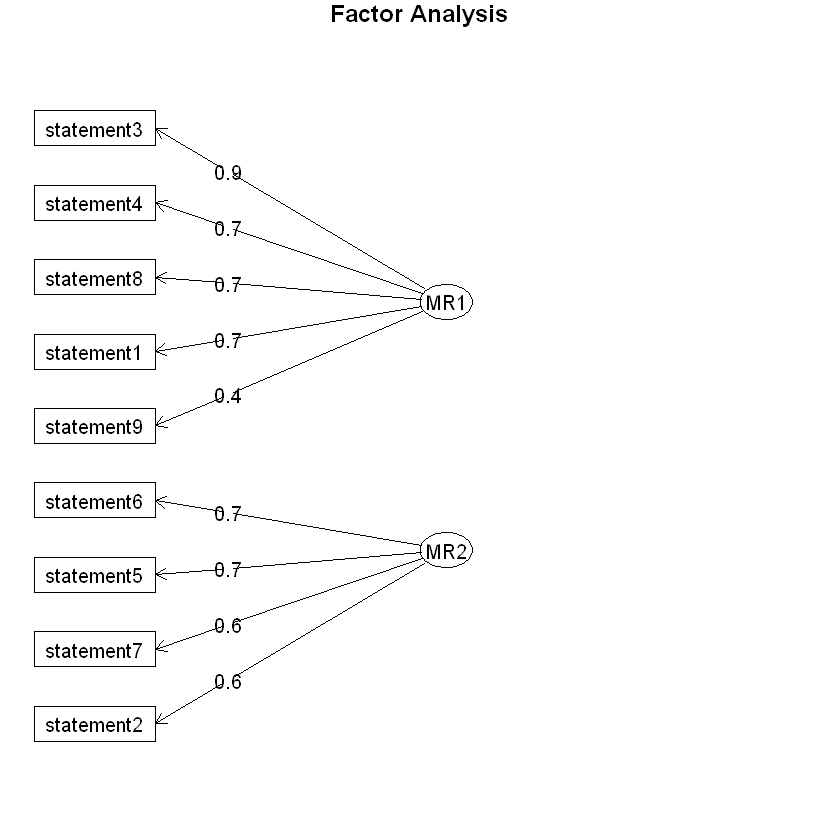

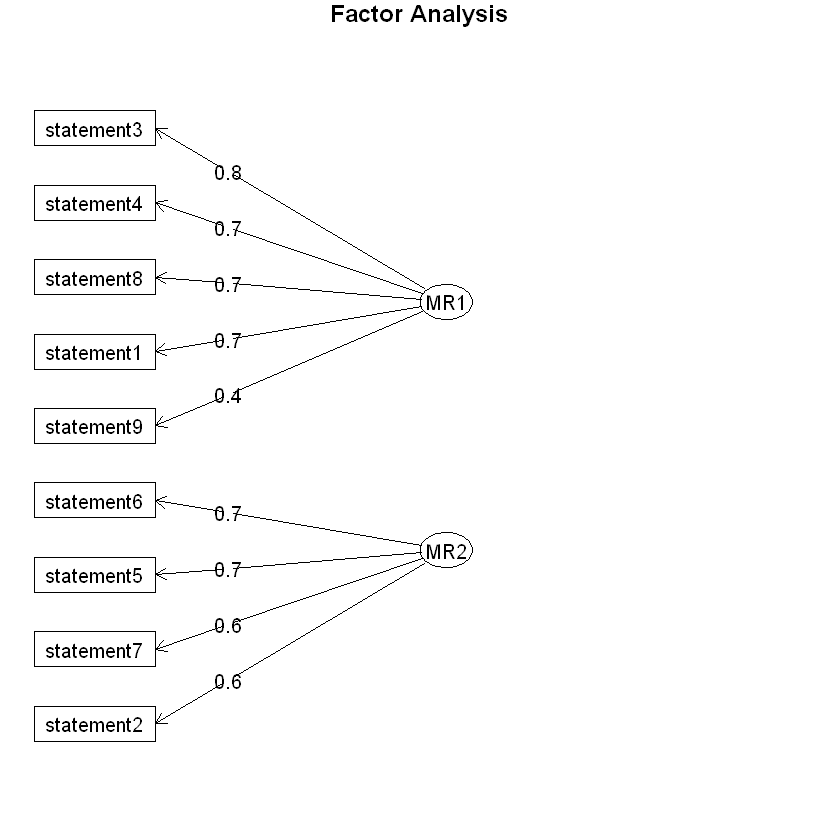

In [233]:
fa.diagram(model_1_ob)
fa.diagram(model_2_var)